In [1]:
from PIL import Image
import numpy as np
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from matplotlib import pyplot
import pandas as pd
import random
import glob
import librosa
import IPython.display as ipd

In [2]:
print(tf.__version__)

2.3.0


In [3]:
model = load_model(r'E:\INSIGHT\PROJECT\REPORTS\custom1\VGG_V1.h5')

In [4]:
def extract_face(filename, required_size=(48, 48)): 
    # load image from file
    faces = []
    image = Image.open(filename)
    data = plt.imread(filename) # COMMENT THIS LINE FOR FASTER EXECUTION
    #plt.imshow(data) # COMMENT THIS LINE FOR FASTER EXECUTION
    ax = plt.gca() # COMMENT THIS LINE FOR FASTER EXECUTION
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    #plt.imshow(pixels)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    #print(len(results))
    for face in results:
        x1, y1, width, height = face['box']
        rect = plt.Rectangle((x1, y1), width, height, fill=False, color='red')
        ax.add_patch(rect) # COMMENT THIS LINE FOR FASTER EXECUTION
        x1, y1 = abs(x1), abs(y1)
        x2, y2 = x1 + width, y1 + height
        # extract the face
        face = pixels[y1:y2, x1:x2]
        # resize pixels to the model size
        image = Image.fromarray(face)
        image = image.resize(required_size)
        faces.append(np.array(image))
    plt.imshow(pixels) # COMMENT THIS LINE FOR FASTER EXECUTION
    return np.array(faces)

In [5]:
def pre_process(file):
    img_ = extract_face(file)
    images=[]
    #pyplot.imshow(img)
    #print(type(img))
    i=0
    for img in img_:
        img = Image.fromarray(img)
        pyplot.subplot(1, len(img_), i+1)
        pyplot.axis('off')
        pyplot.imshow(img)
        #plt.imshow(img)
        img = img.convert('L')
        img = np.array(img, np.float32)
        img = img/255
        img = img.reshape(1,48,48,1)
        images.append(img)
        i+=1
        #print(img.shape)
    pyplot.show()
    return np.array(images)

In [6]:
#pre_process('3.jpg')

In [7]:
def helper(gener):
    
    rand_genere = random.choice(gener)[0]

    print(rand_genere)

    final_gener = pd.read_csv(rand_genere)
    li = final_gener.sample(5)
    li = li.values.tolist()

    sample = 'Music-Genere/Data/genres_original/' + rand_genere[:-4] + '/'

    audio_list=[]

    for i in range(5):
        y, sr = librosa.load(sample+li[i][0],sr=5000, offset=0.0, duration=30)
        audio_list.append(y)

    for i in audio_list:
        ipd.display(ipd.Audio(i,rate=7000))

In [8]:
def emo_to_music(emotion = "Happy"):
    
    pop = glob.glob("pop.csv")
    country = glob.glob("country.csv")
    disco = glob.glob("disco.csv")
    blues = glob.glob("blues.csv")
    reggae = glob.glob("reggae.csv")
    jazz = glob.glob("jazz.csv")
    metal = glob.glob("metal.csv")
    hiphop = glob.glob("hiphop.csv")
    classical = glob.glob("classical.csv")
    rock = glob.glob("rock.csv")
    
    if emotion == "Happy":
        gener = [country,disco,pop,hiphop]
    elif emotion == "Sad":
        gener = [blues,jazz,classical]
    elif emotion == "Angry":
        gener = [metal,rock]
    elif emotion == "Disgust":
        gener = [raggae,metal,rock]
    elif emotion == "Fear":
        gener = [blues,jazz,classical,metal,rock]
    elif emotion == "Surprise":
        gener = [disco,hiphop]
    elif emotion == "Neutral":
        gener = [metal,rock]
    
    helper(gener)

UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node functional_1/conv2d/Conv2D (defined at E:\Anaconda\envs\insight\lib\site-packages\mtcnn\mtcnn.py:342) ]] [Op:__inference_predict_function_1450]

Function call stack:
predict_function


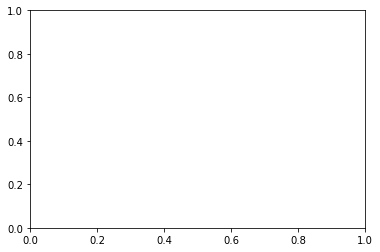

In [9]:
pred=[]
file = r'E:\INSIGHT\PROJECT\REPORTS\custom1\jp1.jpg'
faceimages = pre_process(file)
#print(faceimages[0].shape)
for faces in faceimages:
    cur_pred = (model.predict(
        faces, batch_size=None, verbose=0, steps=None, callbacks=None, max_queue_size=10,
        workers=1, use_multiprocessing=False))
    #print(np.around(cur_pred,3))
    pred.append(cur_pred)
    
pred = np.array(pred)
pred = np.sum(pred,0)
pred = pred/len(faceimages)
#print(np.around(pred,3))
emos = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]


                   
detected_emo = emos[np.argmax(pred, axis=1)[0]]
print(detected_emo)
emo_to_music(detected_emo)